# 1).Problem Statement

### Understanding the properties of product sales at different store

# 2).Hypothesis Generation

# Loading Packages and Data

In [4]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [253]:
#df_test = pd.read_csv("Test.csv")

In [5]:
df = pd.read_csv("Train.csv")

In [255]:
#df = pd.concat([df_train,df_test])

# Data Structure and Content

In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df.shape

(8523, 12)

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis

### Data Consistency

In [10]:
# get all the unique values in the 'Item_Fat_Content' column
Item_Fat_Content_unq =df.Item_Fat_Content.unique()
Item_Fat_Content_unq

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
# sort them alphabetically and then take a closer look
Item_Fat_Content_unq.sort()
Item_Fat_Content_unq

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [12]:
# convert to lower case
df.Item_Fat_Content = df.Item_Fat_Content.str.lower()
# remove trailing white spaces
df.Item_Fat_Content = df.Item_Fat_Content.str.strip()

## Use fuzzy matching to correct inconsistent data entry
#### We're going to use the fuzzywuzzy package to help identify which strings are closest to each other

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# helpful modules
import fuzzywuzzy
from fuzzywuzzy import process
import chardet

In [15]:
# get the top 10 closest matches to " low fat"
matches = fuzzywuzzy.process.extract("low fat" ,Item_Fat_Content_unq , limit=5 , scorer=fuzzywuzzy.fuzz.token_sort_ratio)
# take a closer look 
matches

[('Low Fat', 100), ('low fat', 100), ('LF', 22), ('Regular', 14), ('reg', 0)]

In [16]:
# get the top 10 closest matches to " low fat"
matches = fuzzywuzzy.process.extract("regular" ,Item_Fat_Content_unq , limit=5 , scorer=fuzzywuzzy.fuzz.token_sort_ratio)
# take a closer look 
matches

[('Regular', 100), ('reg', 60), ('LF', 22), ('Low Fat', 14), ('low fat', 14)]

In [17]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio = 22):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [18]:
replace_matches_in_column(df=df, column='Item_Fat_Content', string_to_match="low fat")

All done!


In [19]:
replace_matches_in_column(df=df, column='Item_Fat_Content', string_to_match="regular",min_ratio = 60)

All done!


In [20]:
df.Item_Fat_Content.unique()

array(['low fat', 'regular'], dtype=object)

In [21]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [22]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [23]:
df["Outlet_Size"] = df["Outlet_Size"].str.lower()
df["Outlet_Size"] = df["Outlet_Size"].str.strip()

In [24]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,high,Tier 3,Supermarket Type1,994.7052


# Missing Value Treatment

#### It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [26]:
missing_values_count = df.isnull().sum()
missing_values_count

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## how many total missing values do we have?


In [27]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

percentage = (total_missing/total_cells)*100
print(percentage)

3.786812155344362


### Filling in missing values automatically

#### we notice that missing values are only in 2 columns which is "Item_Weight"  and "Outlet_Size "
#### we need to know how to deal with these missing values ( know if there are not exist or not recorded )
#### if we look at these 2 columns we notice that they are just not recorded

In [28]:
(df.Item_Weight.isnull().sum()/df.shape[0])*100

17.165317376510618

In [29]:
(df.Outlet_Size.isnull().sum()/df.shape[0])*100

28.27642848762173

### I think the best practice is
### replace all NA's with the median for the numeric column 
### then replace all the NA's  with the mode for the categorical column 

In [30]:
df.Item_Weight = df.Item_Weight.fillna(df.Item_Weight.mean())

In [31]:
df.Item_Weight.isna().sum()

0

In [33]:
Outlet_Size_mode =  df.Outlet_Size.mode()
Outlet_Size_mode

0    medium
Name: Outlet_Size, dtype: object

In [36]:
df["Outlet_Size"] = df["Outlet_Size"].fillna(method='bfill', axis=0)

In [37]:
df["Outlet_Size"].isna().sum()

0

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,high,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,high,Tier 3,Supermarket Type1,994.7052


# Outliers

## IQR (Inter Quartile Range)

In [39]:
#''' Detection '''
# IQR
Q1 = np.percentile(df['Item_MRP'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Item_MRP'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Item_MRP']>= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Item_MRP'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (8523, 12)
New Shape:  (8523, 12)


In [41]:
#''' Detection '''
# IQR
Q1 = np.percentile(df['Item_Visibility'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Item_Visibility'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Item_Visibility']>= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Item_Visibility'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (8523, 12)
New Shape:  (8379, 12)


In [49]:
#''' Detection '''
# IQR
Q1 = np.percentile(df['Item_Outlet_Sales'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['Item_Outlet_Sales'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['Item_Outlet_Sales']>= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Item_Outlet_Sales'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (8379, 12)
New Shape:  (8193, 12)


# Graphs

<AxesSubplot:xlabel='Item_Weight'>

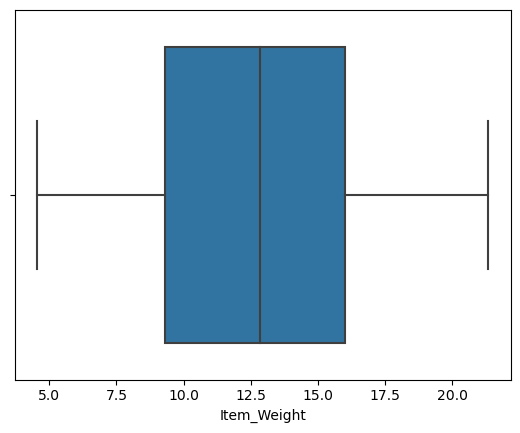

In [302]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility'>

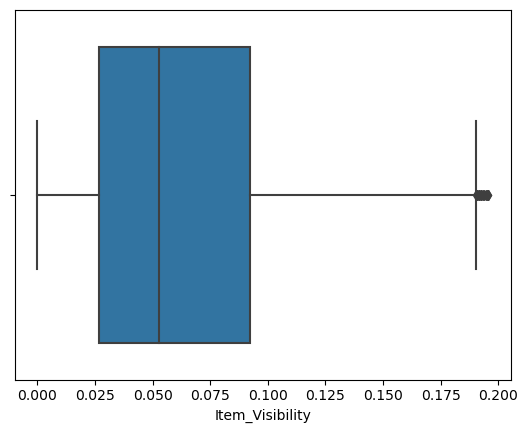

In [313]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

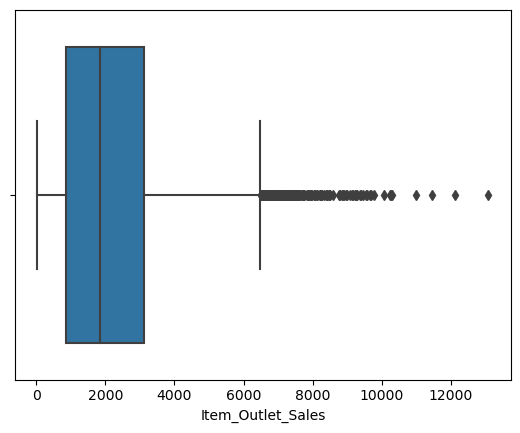

In [314]:
# Box Plot
import seaborn as sns
sns.boxplot(df['Item_Outlet_Sales'])

### C/C : we have removed the outliers in the columns Item_Outlet_Sales and Item_Visibility

# Converting Categorical To Numerical

# Seperating Training And Test Data